In [30]:
jtplot.reset()

In [22]:
from audioFunctions import *
from binaryFunctions import *
from qam import *
from sequenceGenerators import *
from receiver import *
from to_import import *

In [23]:
CE_binary = fileToBinary('Data_Files/Holiday.txt')
binary = fileToBinary('Data_Files/homecoming.txt')

CE_symbols = qpsk(CE_binary)
symbols = qpsk(binary)

In [3]:
# So far this works the best at estimating the location... 
chirp_signal = Chirp(500,20500,0.5, volume = 50)

In [4]:
# For channel esimation (CE)

# ofdmSymbols(encoded_symbols, CP_length, DFT_length, max_freq_index=0)
CE_Time, CE_Freq, CE_Long = ofdmSymbols(CE_symbols, 2048, 2048)

In [5]:
# Prepare what to transmit for channel estimation 
CE_transmit = repeat_signal(CE_Time[0], 20)
known_freq = CE_Freq[0]

In [6]:
pause_after_chirp = 0.25
x = save_transmit( (chirp_signal, Pause(pause_after_chirp), CE_transmit, Pause(0.1)) , playOutput=False)
#x = save_transmit( (Pause(1), chirp_signal) ) #, Pause(pause_after_chirp) ) )
print("Transmit signal is ", round(len(x)/fs, 2), " seconds")

Transmit signal is  2.71  seconds


In [205]:
sec = math.ceil(len(x)/fs) + 4
location = 'workdesk'
#y = record_and_save('speakertolaptop.wav', sec)
#y = audioDataFromFile('recorded_data_' + location + '.wav')
y = audioDataFromFile('Wav_Files/recorded_data_piano room.wav')

In [206]:
# obtain only the time series we are interested in 
y_dash = removeChirpAndPause(y, chirp_signal, pause_after_chirp, plot = False, rng = 40)

In [207]:
#sliceData(time_data, timeshift, N, K, repeat)
CE_samples, CE_freq, remaining = sliceData(y_dash, 2048, 2048, 2048, 20)


In [208]:

freq = []
for sample in CE_samples:
    freq.append( fft( np.roll(sample, 3) ) )


CE_time_adjusted_freq = np.array(freq)
impulse_simple_by_eye, TF_by_eye = getImpulseSimple(CE_time_adjusted_freq, known_freq, len(CE_freq[0]), len(CE_freq))



/Users/kaijunge/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


'\nplot_y(np.array(TF_by_eye)[:1024].real, title = "real component of TF")\nplot_y(np.array(TF)[:1024].real)\n\nplot_y(np.array(TF_by_eye)[:1024].imag, f =1 ,title = "imag component of TF")\nplot_y(np.array(TF)[:1024].imag, f = 1)\n\nplot_y(np.absolute(TF)[:1024], f=4)\n'

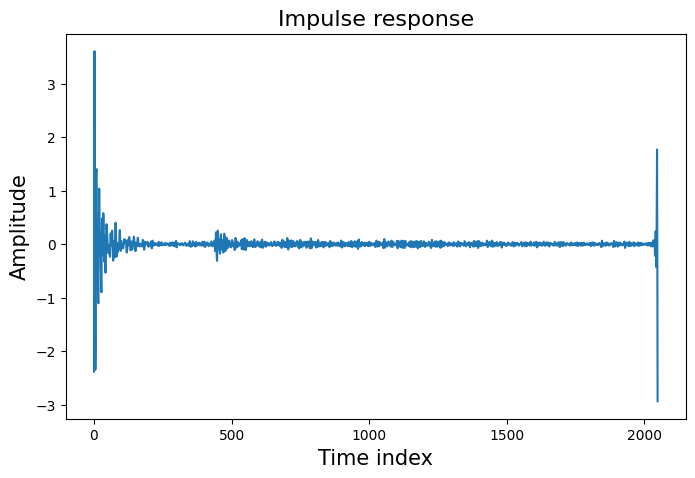

In [210]:
# getImpulseSimple(freq, known_freq, N, repeat)
impulse_simple, TF = getImpulseSimple(CE_freq, known_freq, len(CE_freq[0]), len(CE_freq))
impulse_simple_by_eye, TF_by_eye = getImpulseSimple(CE_time_adjusted_freq, known_freq, len(CE_freq[0]), len(CE_freq))

#plot_y(impulse_simple[1900:])



'''y_plotting = impulse_simple_by_eye[:700]
magnitude = np.absolute(TF)[:1023]
freq_x = np.linspace(0, fs/2, 1023)
## FOR PLOTTING ONLY

fig, ax = plt.subplots(1, 2, figsize = (11, 5))
ax[0].plot(y_plotting)
ax[0].set_ylabel("Log magnitude", fontsize = 13)
ax[0].set_xlabel("Time index", fontsize = 13)
ax[0].set_title("Impulse response",fontsize = 13)


ax[1].plot(freq_x, magnitude)
ax[1].set_yscale("log")
ax[1].set_ylabel("Log magnitude", fontsize = 13)
ax[1].set_xlabel("Frequency", fontsize = 13)
ax[1].set_title("Magnitude plot",fontsize = 13)
#plt.subplots_adjust(wspace=0, hspace=0.15)

plt.suptitle("Speaker: iPhone, Mic: Macbook, Location: Piano Room")
plt.subplots_adjust(top=0.86)

plt.savefig("Data_Files/impulse9.pdf")

## FOR PLOTTING ONLY'''



y_plotting = impulse_simple_by_eye#[:700]
plt.figure(2, figsize =(8,5))
x = np.linspace(0, len(y_plotting), len(y_plotting))
plt.plot(x, y_plotting)
plt.title('Impulse response', fontsize = 16)
plt.xlabel("Time index", fontsize = 15)
plt.ylabel("Amplitude", fontsize = 15)

plt.savefig("Data_Files/impulse_piano.pdf")

'''
plot_y(np.array(TF_by_eye)[:1024].real, title = "real component of TF")
plot_y(np.array(TF)[:1024].real)

plot_y(np.array(TF_by_eye)[:1024].imag, f =1 ,title = "imag component of TF")
plot_y(np.array(TF)[:1024].imag, f = 1)

plot_y(np.absolute(TF)[:1024], f=4)
'''

012345678910111213141516171819

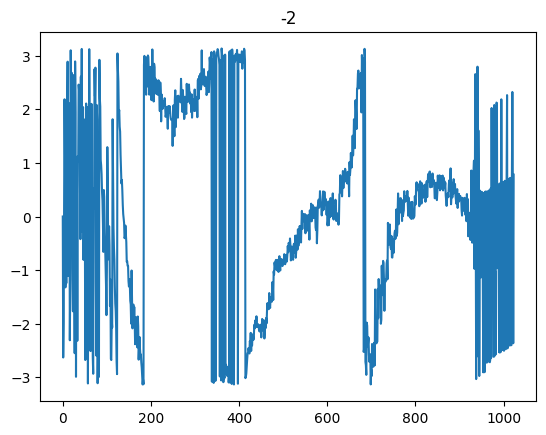

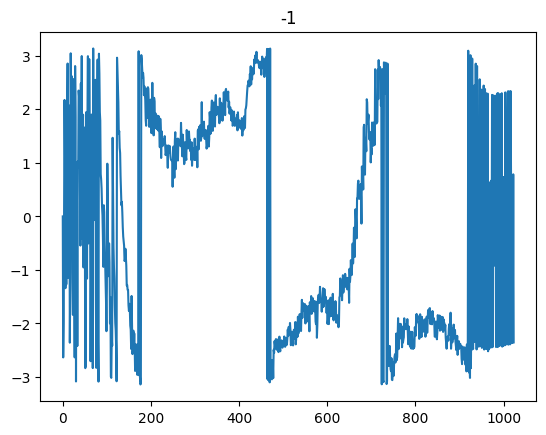

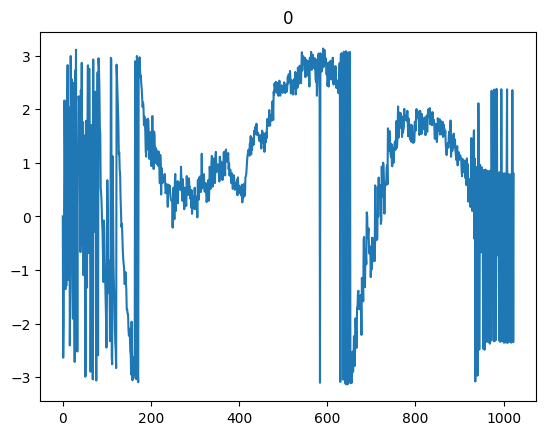

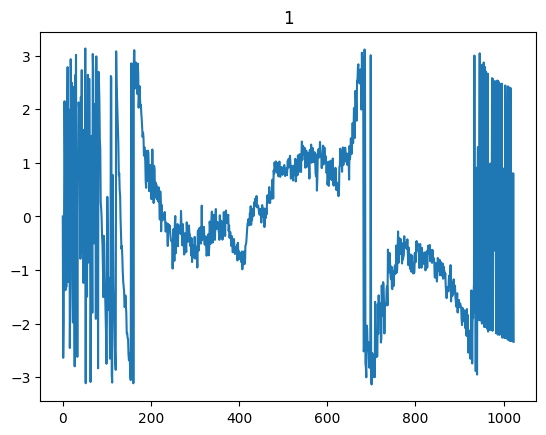

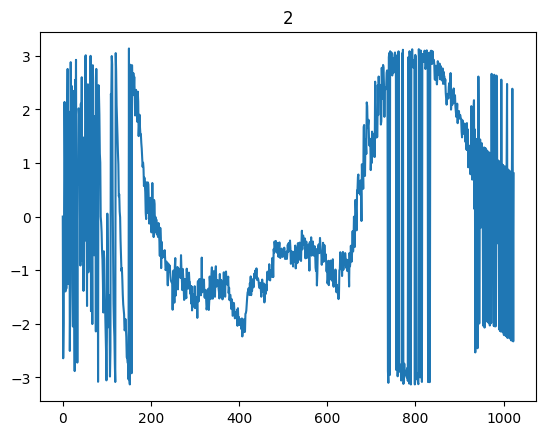

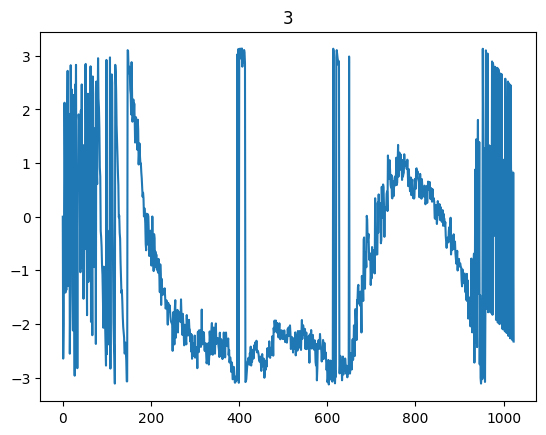

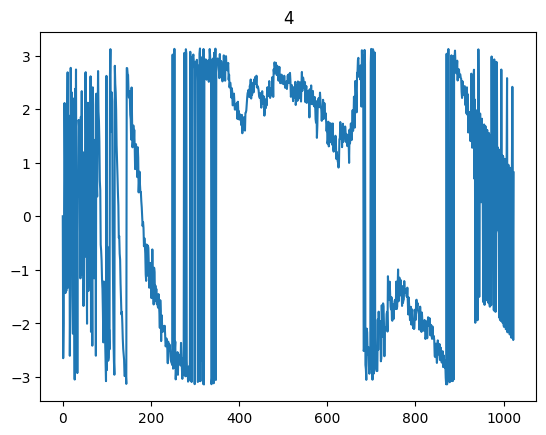

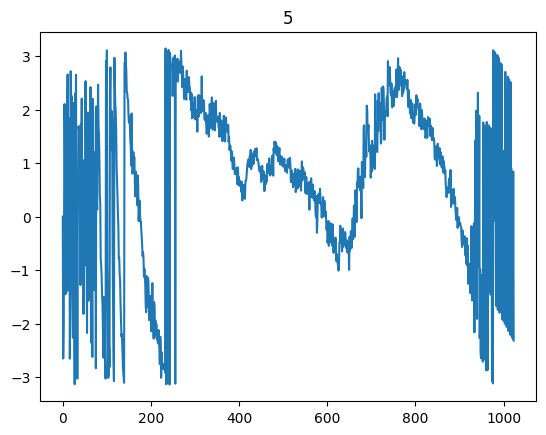

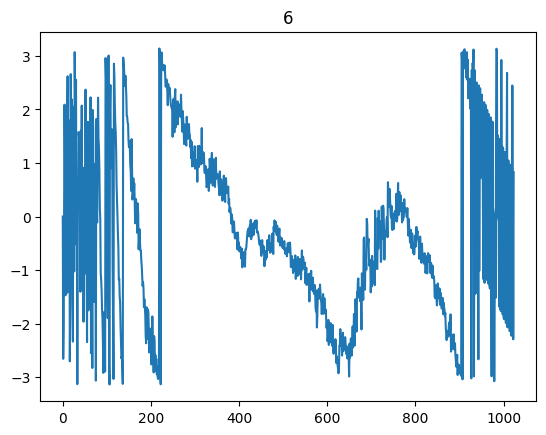

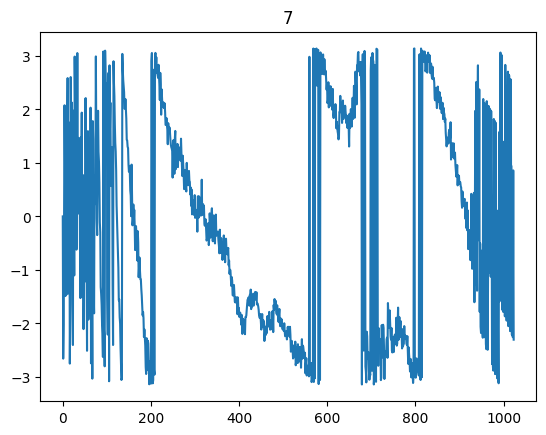

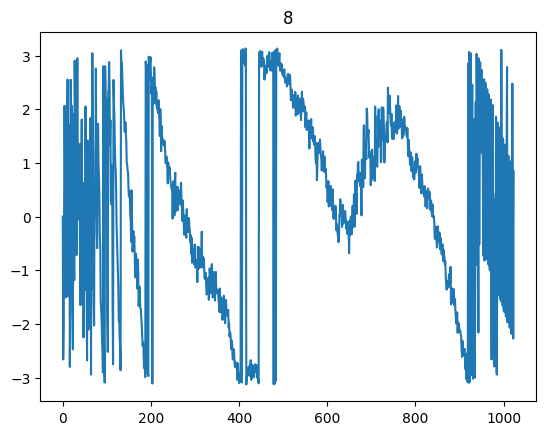

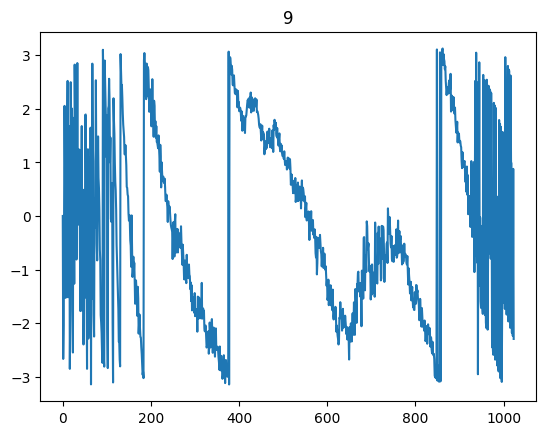

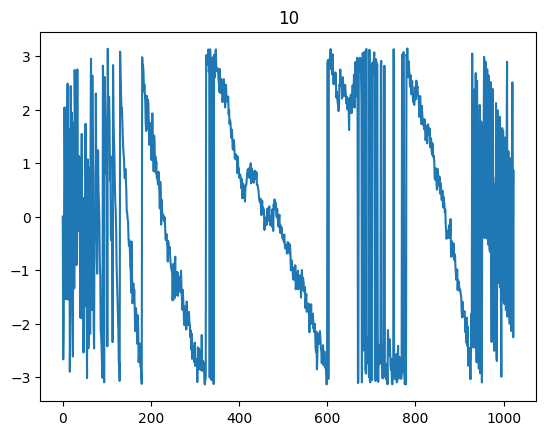

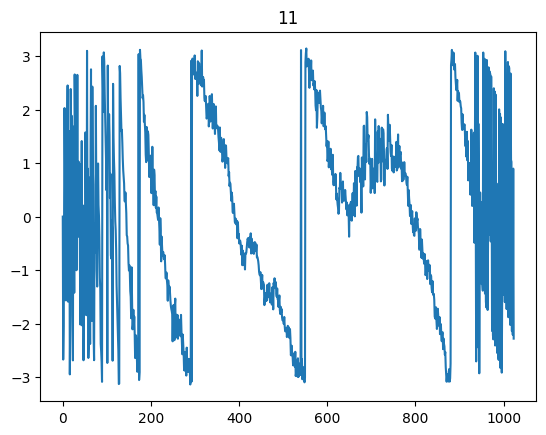

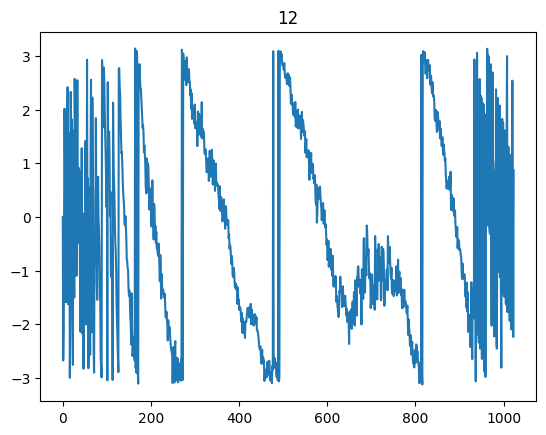

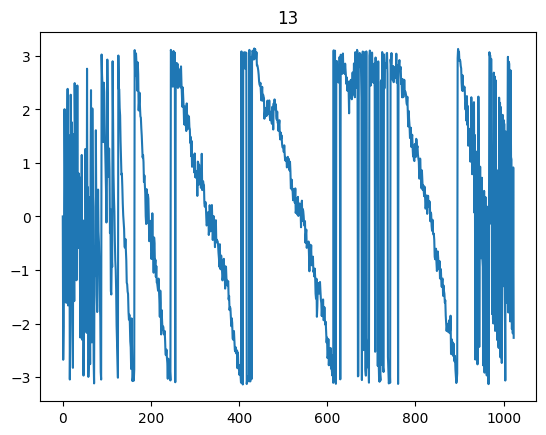

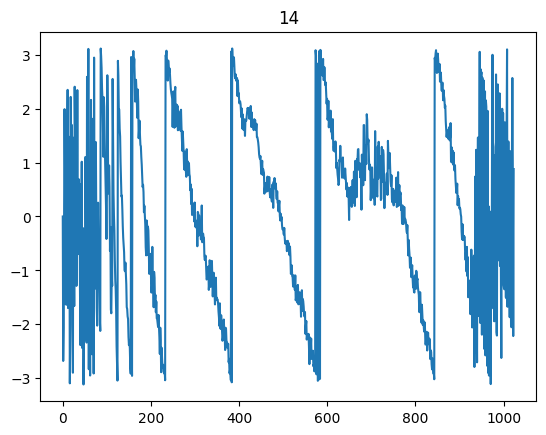

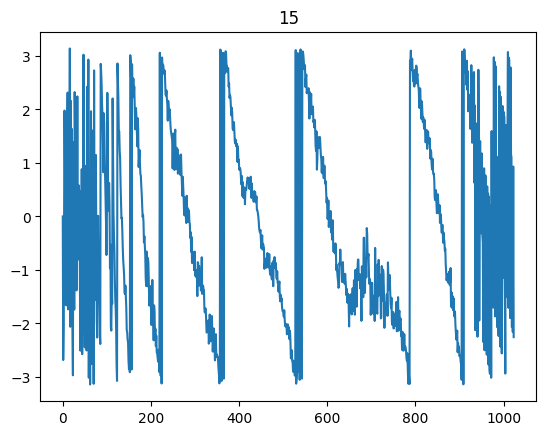

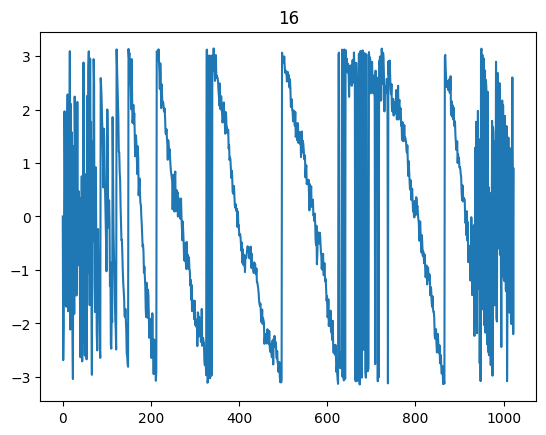

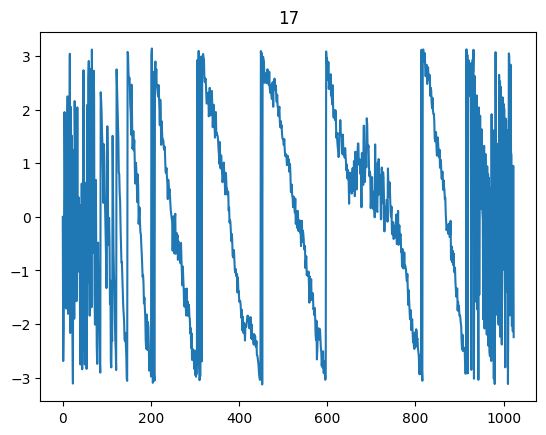

In [185]:
for i in range(20):
    freq = []
    ind = -2+i
    for sample in CE_samples:
        np.roll(sample, -1)
        freq.append( fft( np.roll(sample, ind) ) )


    CE_time_adjusted_freq = np.array(freq)
    impulse_simple_by_eye, TF_by_eye = getImpulseSimple(CE_time_adjusted_freq, known_freq, len(CE_freq[0]), len(CE_freq))

    ph_by_eye = getPhase2(TF_by_eye)
    
    print(i, end= '')
    plot_y(ph_by_eye, f= i, title = str(ind))
    
    if i == 14:
        plt.savefig("Data_Files/phase.pdf")


1023 1023


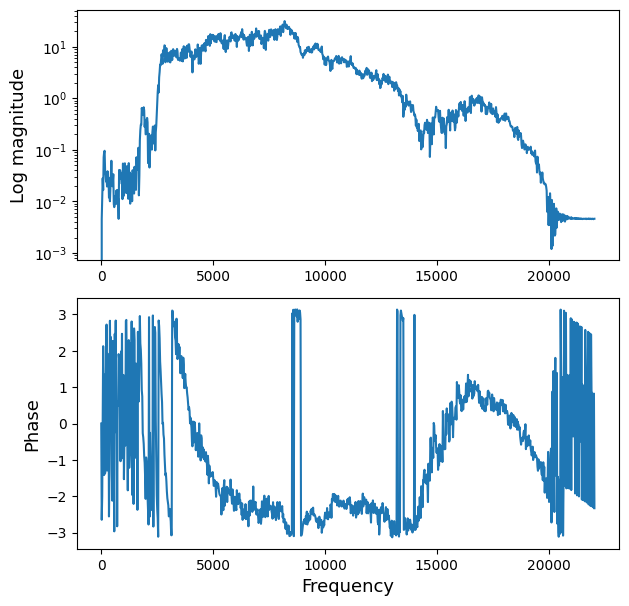

In [187]:
freq = []
ind = 3
for sample in CE_samples:
    np.roll(sample, -1)
    freq.append( fft( np.roll(sample, ind) ) )

CE_time_adjusted_freq = np.array(freq)
impulse_simple_by_eye, TF_by_eye = getImpulseSimple(CE_time_adjusted_freq, known_freq, len(CE_freq[0]), len(CE_freq))

phase = getPhase2(TF_by_eye)
magnitude = np.absolute(TF)[:1023]
 
print(len(phase), len(magnitude))

freq_x = np.linspace(0, fs/2, 1023)

#freq_x = np.linspace(0, 1, 1023)

fig, ax = plt.subplots(2, 1, figsize = (7, 7))
ax[0].plot(freq_x, magnitude)
ax[0].set_yscale("log")
#ax[0].tick_params(axis = "x", which = "both", bottom = True, top = False, labelbottom = False)
ax[0].set_ylabel("Log magnitude", fontsize = 13)


ax[1].plot(freq_x, phase)
ax[1].set_ylabel("Phase", fontsize = 13)
ax[1].set_xlabel("Frequency", fontsize = 13)
plt.subplots_adjust(wspace=0, hspace=0.15)

plt.savefig("Data_Files/bode_piano.pdf")

In [103]:
def getPhase2(TF):
    Phase = [0]
    for i in range(1, int( len(TF)/2 )-1):
        Phase.append(cmath.phase(  TF[i]  ))
    
    return np.asarray(Phase)

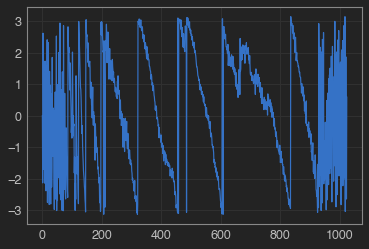

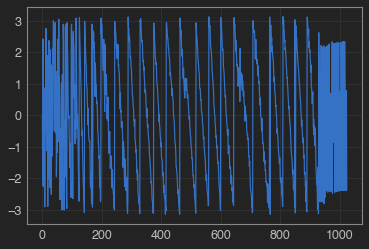

In [105]:
ph_by_eye = getPhase2(TF_by_eye)
ph        = getPhase2(TF)

plot_y(ph_by_eye)#[516:600])
plot_y(ph, f= 1)

17


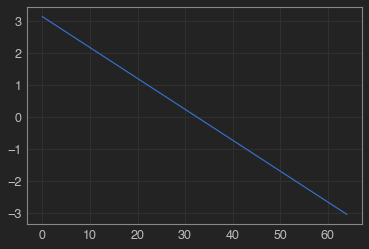

In [100]:
input_array = ph_by_eye[300:800]
corr = []
lines = []
for i in range(1, 1024):
    grad = -2*math.pi*i/2048
    
    line = []
    for j in range(10000):
        y = grad*j + math.pi
        
        if y > -1*math.pi:
            line.append(y)
        else:
            break
    corr.append(max(np.correlate(input_array, line)))
    lines.append(line)
    
#plot_y(corr)
plot_y(lines[31])
print(np.argmax(corr))